# Prueba Técnica Redegal
## Alberto Fontán

In [290]:
import pandas as pd

In [291]:
# Función para leer el csv de cualquier conjunto de datos mensual de "Yellow Taxi" sin especificar directamente el nombre completo del fichero
def readCSV_YellowTaxi(year, month):
    #Se convierten a tipo string para pasar a la función read_csv de pandas
    year = str(year)
    #Si es un mes por debajo de 10 añadir el 0 a la izquierda al texto
    month = "{:02d}".format(month)
    return pd.read_csv('yellow_tripdata_'+year+'-'+month+'.csv')

In [292]:
datos = readCSV_YellowTaxi(2021,7)

/tmp/ipykernel_65/2343010615.py:1: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  datos = readCSV_YellowTaxi(2021,7)


In [293]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821515 entries, 0 to 2821514
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 387.5+ MB


In [294]:
datos.head(n=10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-07-01 00:08:51,2021-07-01 00:13:05,1.0,0.8,1.0,N,90,68,1.0,5.0,3.0,0.5,0.00,0.0,0.3,8.80,2.5
1,1.0,2021-07-01 00:22:39,2021-07-01 00:25:58,1.0,0.9,1.0,N,113,90,2.0,5.0,3.0,0.5,0.00,0.0,0.3,8.80,2.5
2,1.0,2021-07-01 00:48:33,2021-07-01 00:54:58,1.0,2.8,1.0,N,88,232,2.0,10.0,3.0,0.5,0.00,0.0,0.3,13.80,2.5
3,1.0,2021-07-01 00:59:44,2021-07-01 01:07:09,1.0,1.4,1.0,N,79,249,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
4,1.0,2021-07-01 00:08:35,2021-07-01 00:16:28,0.0,2.0,1.0,N,142,238,1.0,8.5,3.0,0.5,0.00,0.0,0.3,12.30,2.5
5,1.0,2021-07-01 00:10:49,2021-07-01 00:18:42,1.0,1.6,1.0,N,114,90,1.0,7.5,3.0,0.5,1.50,0.0,0.3,12.80,2.5
6,1.0,2021-07-01 00:28:56,2021-07-01 00:36:11,1.0,1.8,1.0,N,90,144,1.0,7.5,3.0,0.5,2.00,0.0,0.3,13.30,2.5
7,1.0,2021-07-01 00:45:10,2021-07-01 00:52:46,1.0,2.0,1.0,N,114,48,1.0,8.5,3.0,0.5,2.45,0.0,0.3,14.75,2.5
8,1.0,2021-07-01 00:55:43,2021-07-01 01:10:56,1.0,5.7,1.0,N,48,152,2.0,18.5,3.0,0.5,0.00,0.0,0.3,22.30,2.5
9,1.0,2021-07-01 00:04:24,2021-07-01 00:13:23,1.0,1.8,1.0,N,234,148,1.0,8.5,3.0,0.5,2.45,0.0,0.3,14.75,2.5


Al leer el fichero nos da un warning que indica que la columna 6 tiene varios tipos de datos mezclados, por lo que si se revisan los datos, vemos que el problema está en la columna "store_and_fwd_flag". Como no sé de que se trata dicha columna, buscamos si hay algún tipo de metainformación en la página en la que obtenemos los datos:
https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

Se indica que es un valor que determina si el viaje se almacena en la memoría del vehículo y que por lo tanto tiene 2 valores:
 - Y, si se almacena
 - N, si no se almacena
 
 
Así pues, este no es un problema y menos que nos vaya a influir en nuestro objetivo principal de la prueba que es:

**Devolver como resultado los 10 destinos (incluyendo la información
de Borough y Zone) con el mayor número de viajes que, individualmente, superan el percentil
0.95 en distancia por viaje**

Por tanto, en primer lugar, **debemos atender a la columna "trip_distance"** que es la distancia transcurrida en el trayecto en millas, y a partir de la cual debemos extraer los trayectos que superan dicho percentil 95.

In [295]:
#Seleccionamos solo el conjunto del dataframe con todas las filas y solo la columna trip_distance
datos_distance = datos.loc[:,'trip_distance']

Hacemos una pequeña visualización de los valores de los datos y como están distribuidos

In [296]:
datos_distance.describe()

count    2.821515e+06
mean     7.786647e+00
std      7.608191e+02
min      0.000000e+00
25%      1.100000e+00
50%      1.890000e+00
75%      3.450000e+00
max      3.053976e+05
Name: trip_distance, dtype: float64

En este caso y para este mes concreto se puede ver en una primera visualización general que la mayoría de los trayectos están en **entre a la milla y las 3.45 millas, como nos indican los cuartiles y la mediana**, y que hay valores más atípicos en lo que a la distancia respecta con trayectos muy superiores a estos y también trayectos de 0 millas lo cual no tiene mucho sentido y podrían estar almacenados inúltimente o por alguna otra causa.

En cuanto a la media, esta esta puede estar bastante afectada por los valores muy grandes o muy pequeños, por lo que considera la mediana como una medida más robusta y representativa de las distancias que recorren la mayoría de trayectos.

Además para ver esta distribución de los datos, representaremos un diagrama de caja y bigotes

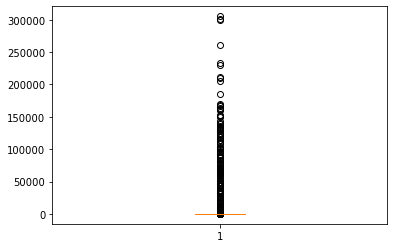

In [297]:
import matplotlib.pyplot as plt

box = plt.boxplot(datos_distance)

No obstante, es **inapreciable la caja con los cuartiles y la mediana debido a la existencia de valores extremadamente altos** que incrementan la escala del gráfico, por lo que limitaré el eje Y entre el rango de los cuartiles más la media y se dejarán de ver estos datos exageradamente grandes.

In [298]:
cuartil1 = datos_distance.describe().loc['25%']
cuartil3 = datos_distance.describe().loc['75%']
media = datos_distance.describe().loc['mean']

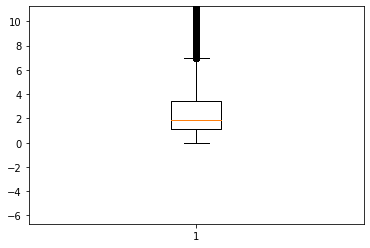

In [299]:
import matplotlib.pyplot as plt

plt.boxplot(datos_distance)
plt.ylim(cuartil1-media, cuartil3+media)
plt.show()

In [300]:
#Devuelve los datos (columnas) que superan el percentil indicado.
#Permite especificar un dataset cargado o por defecto el dataset cargado en la variable datos
def aboveQuantile(quantile, df = None):
    if df is None:
        df = datos
    return df[df.trip_distance > df.trip_distance.quantile(quantile)]

## Superan percentil indicado

In [301]:
#Superan el percentil 95
aboveQuantile(0.95)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
19,2.0,2021-07-01 00:49:52,2021-07-01 01:13:59,1.0,17.07,2.0,N,132,74,1.0,52.00,0.00,0.5,10.00,6.55,0.3,70.60,0.0
28,1.0,2021-07-01 00:08:19,2021-07-01 00:47:23,1.0,18.60,2.0,N,132,158,1.0,52.00,3.75,0.5,10.00,6.55,0.3,73.10,2.5
31,2.0,2021-07-01 00:29:07,2021-07-01 01:13:04,5.0,14.23,1.0,N,61,74,1.0,44.00,0.50,0.5,3.00,0.00,0.3,50.80,2.5
34,2.0,2021-07-01 00:29:11,2021-07-01 01:02:50,2.0,19.19,2.0,N,132,90,1.0,52.00,0.00,0.5,12.62,6.55,0.3,75.72,2.5
35,1.0,2021-07-01 00:11:57,2021-07-01 00:41:22,2.0,16.80,2.0,N,132,164,2.0,52.00,3.75,0.5,0.00,6.55,0.3,63.10,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821501,NaN,2021-07-09 18:07:33,2021-07-09 18:07:59,NaN,14.34,NaN,NaN,265,197,NaN,45.81,0.00,0.5,0.00,0.00,0.3,46.61,0.0
2821505,NaN,2021-07-09 18:37:32,2021-07-09 19:16:55,NaN,17.11,NaN,NaN,186,132,NaN,59.99,0.00,0.5,15.23,6.55,0.3,85.07,2.5
2821506,NaN,2021-07-09 18:14:00,2021-07-09 18:57:00,NaN,18.16,NaN,NaN,256,132,NaN,44.85,0.00,0.5,10.05,0.00,0.3,55.70,0.0
2821507,NaN,2021-07-09 18:29:00,2021-07-09 19:32:00,NaN,20.92,NaN,NaN,29,193,NaN,77.70,0.00,0.5,0.00,0.00,0.3,78.50,0.0


## Agrupación por trayecto

In [302]:
# Devuelve los trayectos agrupados por origen y destino, y cuantos recorridos se agrupan se han realizado en cada trayecto en la columna "count"
# Se puede especificar el orden para sacar primero los más veces realizados o no
def groupByTrip(df = None, ascending = False):
    if df is None:
        df = datos
    # Se devuelven ordenados de forma descendente para los que trayectos más veces realizados se muestren primero
    return (df.groupby(['PULocationID', 'DOLocationID']).size().sort_values(ascending=ascending).reset_index(name='count'))

In [303]:
#Por tanto se agrupan por trayecto los viajes que superan el percentil 95 en orden descendente de los más realizados.
groupByTrip(df = aboveQuantile(0.95))

,PULocationID,DOLocationID,count
0,132,230,3018
1,132,265,2763
2,132,48,2152
3,132,164,1780
4,132,170,1711
...,...,...,...
11909,148,174,1
11910,148,160,1
11911,148,157,1
11912,148,155,1


## Se seleccionan los 10 primeros trayectos

In [304]:
trayectos = groupByTrip(df = aboveQuantile(0.95)).iloc[:10 , :]
trayectos

,PULocationID,DOLocationID,count
0,132,230,3018
1,132,265,2763
2,132,48,2152
3,132,164,1780
4,132,170,1711
5,132,163,1582
6,132,68,1387
7,132,79,1362
8,132,162,1265
9,132,181,1225


## Se sustituyen los IDs por los nombres de las Zonas para imprimir la salida deseada

In [305]:
locationsID = pd.read_csv('taxi+_zone_lookup.csv')
locationsID

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [306]:
import numpy as np
new_val = locationsID.loc[:,['Borough']].to_numpy()

trayectosWithNames = trayectos.copy()
for locID in locationsID.LocationID:
    trayectosWithNames['PULocationID'].replace(to_replace = [locID], 
                                               value = str(locationsID.iloc[locID-1].Borough)+' - '+str(locationsID.iloc[locID-1].Zone), inplace = True)
    trayectosWithNames['DOLocationID'].replace(to_replace = [locID], 
                                               value = str(locationsID.iloc[locID-1].Borough)+' - '+str(locationsID.iloc[locID-1].Zone), inplace = True)


trayectosWithNames.rename(columns = {'PULocationID':'Start Boroguh-Zone', 'DOLocationID':'End Boroguh-Zone', 'count':'Trips'}, inplace = True)
trayectosWithNames

,Start Boroguh-Zone,End Boroguh-Zone,Trips
0,Queens - JFK Airport,Manhattan - Times Sq/Theatre District,3018
1,Queens - JFK Airport,Unknown - nan,2763
2,Queens - JFK Airport,Manhattan - Clinton East,2152
3,Queens - JFK Airport,Manhattan - Midtown South,1780
4,Queens - JFK Airport,Manhattan - Murray Hill,1711
5,Queens - JFK Airport,Manhattan - Midtown North,1582
6,Queens - JFK Airport,Manhattan - East Chelsea,1387
7,Queens - JFK Airport,Manhattan - East Village,1362
8,Queens - JFK Airport,Manhattan - Midtown East,1265
9,Queens - JFK Airport,Brooklyn - Park Slope,1225
